Xist resources:
    
    Barbara Panning (UCSF): https://stemcell.ucsf.edu/panning

Liver resources:

    Bruce Wang (UCSF): http://brucewanglab.ucsf.edu/

In [1]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import scanpy as sc
from pca import LowRank, n2s_low_rank
from diffusion import n2s_magic
from util import standard_scanpy

In [2]:
adata = sc.read('/Users/josh/src/noise2self-single-cell/data/tabulamuris/hepatocytes.h5ad')

In [3]:
adata = adata[adata.obs['mouse.sex'] == 'F']

In [4]:
xist = adata[:,'Xist'].X
counts = adata.obs['n_counts']

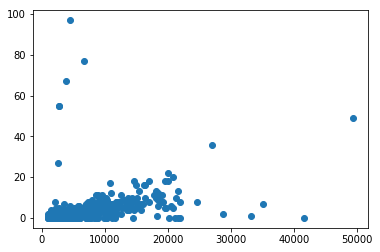

In [5]:
plt.scatter(counts, xist)

In [20]:
adata = standard_scanpy(adata)

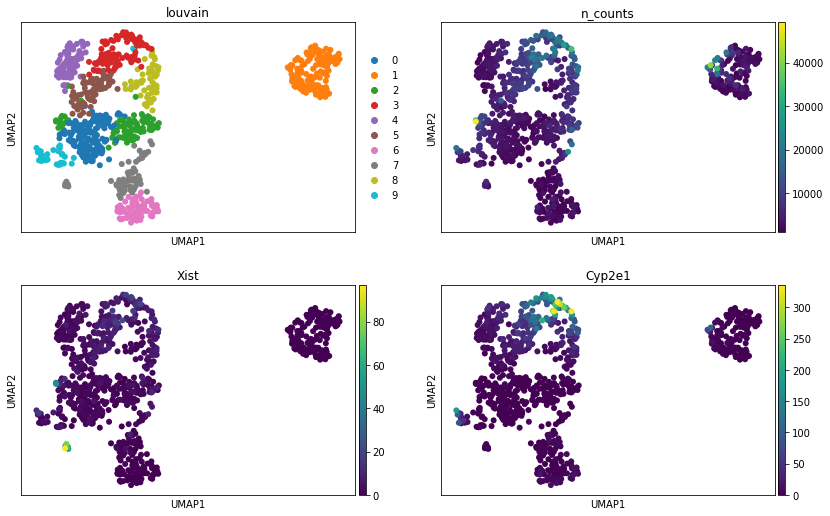

In [21]:
sc.pl.umap(adata, color=['louvain', 'n_counts', 'Xist', 'Cyp2e1'], ncols = 2)

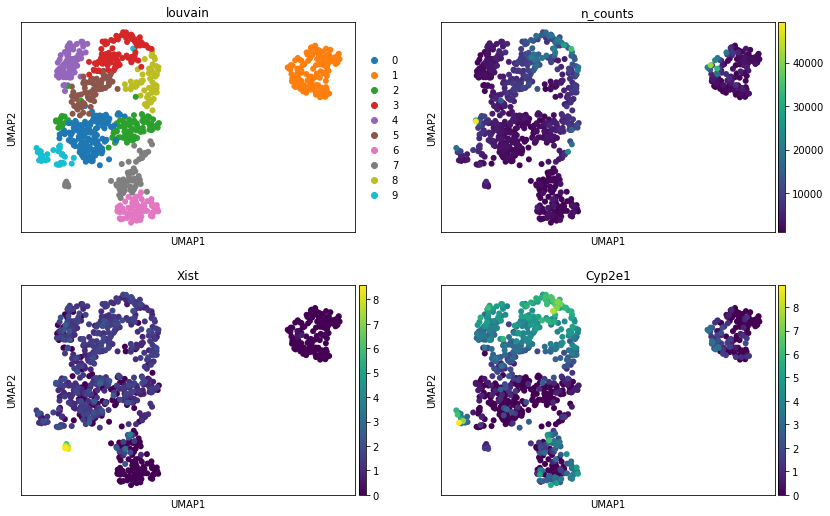

In [24]:
sc.pl.umap(adata, color=['louvain', 'n_counts', 'Xist', 'Cyp2e1'], ncols = 2, use_raw = False)

(array([490., 208.,  91.,  19.,   7.,   3.,   1.,   1.,   0.,   1.]),
 array([0.        , 0.00037418, 0.00074836, 0.00112254, 0.00149673,
        0.00187091, 0.00224509, 0.00261927, 0.00299345, 0.00336763,
        0.00374181], dtype=float32),
 <a list of 10 Patch objects>)

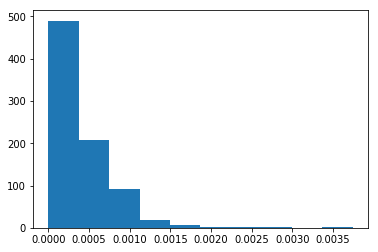

In [27]:
plt.hist(xist[xist < 20]/counts[xist < 20])

(array([133.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.]),
 ArrayView([0.        , 0.06967969, 0.13935938, 0.20903906, 0.27871877,
            0.34839845, 0.41807812, 0.48775783, 0.55743754, 0.6271172 ,
            0.6967969 ], dtype=float32),
 <a list of 10 Patch objects>)

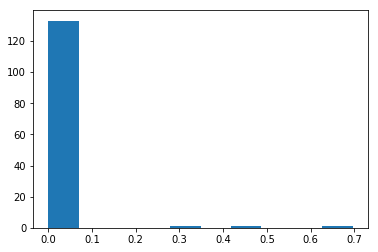

In [29]:
plt.hist(adata[adata.obs['louvain'] == '1'][:,'Xist'].X)

(array([255., 354.,  75.,   4.,   1.,   0.,   0.,   2.,   0.,   4.]),
 ArrayView([0.        , 0.85975134, 1.7195027 , 2.579254  , 3.4390054 ,
            4.2987566 , 5.158508  , 6.018259  , 6.8780107 , 7.737762  ,
            8.597513  ], dtype=float32),
 <a list of 10 Patch objects>)

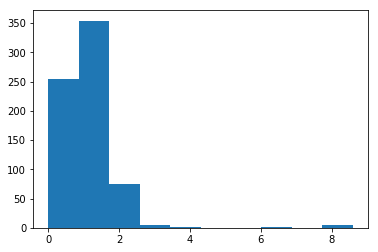

In [30]:
plt.hist(adata[adata.obs['louvain'] != '1'][:,'Xist'].X)

(array([255., 354.,  75.,   4.,   1.,   0.,   0.,   2.,   0.,   4.]),
 ArrayView([0.        , 0.85975134, 1.7195027 , 2.579254  , 3.4390054 ,
            4.2987566 , 5.158508  , 6.018259  , 6.8780107 , 7.737762  ,
            8.597513  ], dtype=float32),
 <a list of 10 Patch objects>)

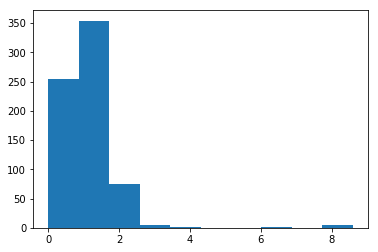

Optimal rank: 5


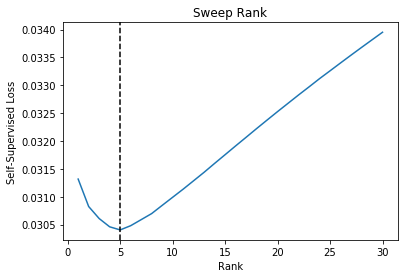

In [33]:
denoised_pca = n2s_low_rank(adata)

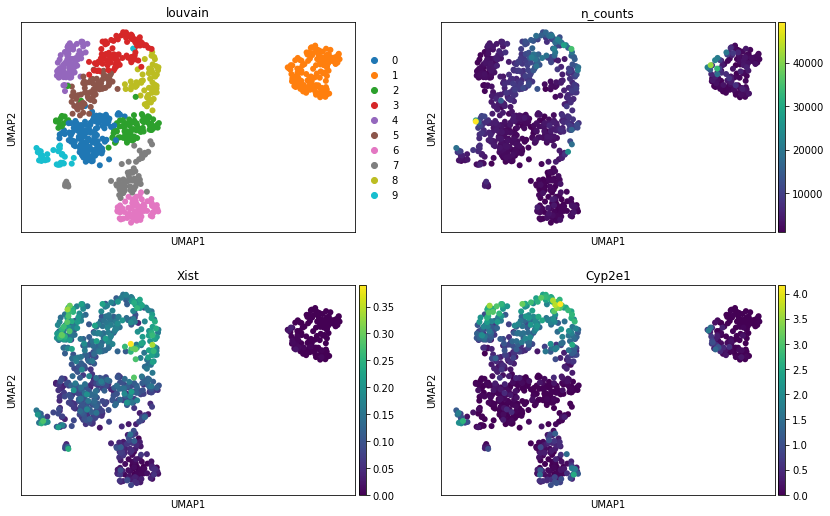

In [36]:
sc.pl.umap(denoised_pca, color=['louvain', 'n_counts', 'Xist', 'Cyp2e1'], ncols = 2, use_raw = False)

Running MAGIC on 831 cells and 10065 genes.
Calculating graph and diffusion operator...
  Calculating PCA...


/Users/josh/.local/lib/python3.6/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Calculated PCA in 1.32 seconds.
  Calculating KNN search...
  Calculated KNN search in 0.13 seconds.
  Calculating affinities...
  Calculated affinities in 0.07 seconds.
Calculated graph and diffusion operator in 1.56 seconds.


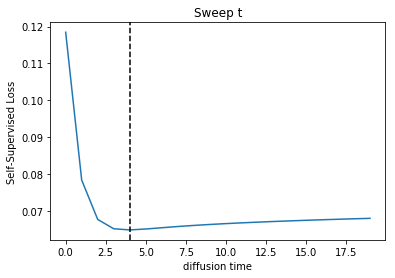

In [37]:
denoised_magic, _ , _ = n2s_magic(adata)

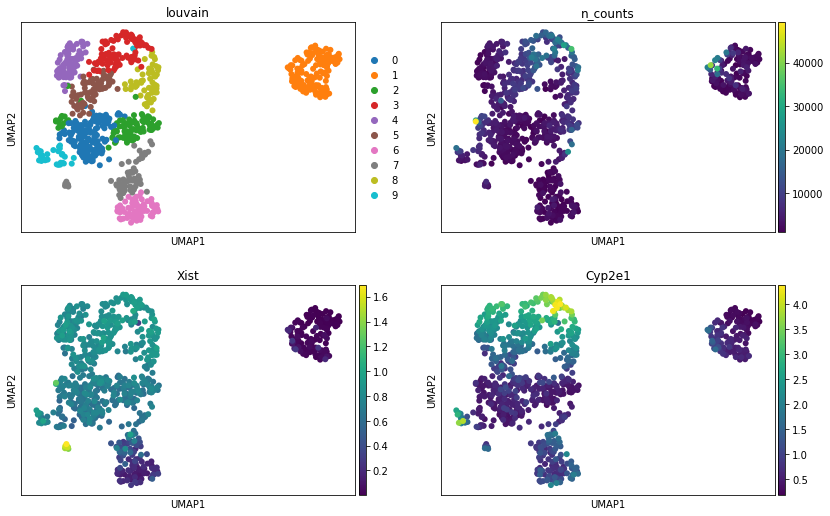

In [41]:
sc.pl.umap(denoised_magic[0], color=['louvain', 'n_counts', 'Xist', 'Cyp2e1'], ncols = 2, use_raw = False)

In [42]:
adata.write_h5ad('/Users/josh/src/noise2self-single-cell/data/tabulamuris/female_hepatocytes.h5ad')

In [43]:
adata

AnnData object with n_obs × n_vars = 831 × 10065 
    obs: 'cell', 'channel', 'mouse.id', 'tissue', 'subtissue', 'mouse.sex', 'method', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'pca', 'neighbors', 'louvain', 'louvain_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

# Correlates

It is possible that this is really about nuclear lysis. If so, Xist expression should go along with other nuclear RNA like Malat1.

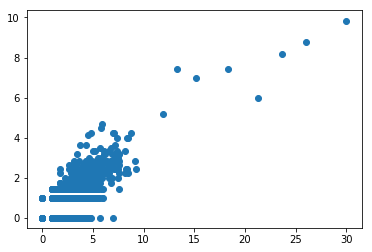

In [6]:
xist = adata[:,'Xist'].X
malat1 = adata[:, 'Malat1'].X
counts = adata.obs['n_counts']

plt.scatter(np.sqrt(malat1), np.sqrt(xist))

Top correlates of sqrt-normalized data

In [7]:
c = np.corrcoef(np.sqrt(np.hstack([adata[:,'Xist'].X[:,np.newaxis], adata.X])).T)

/Users/josh/anaconda3/envs/pytorch/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/josh/anaconda3/envs/pytorch/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [8]:
for i, j in zip(adata.var_names[np.argsort(-c[0])[1:20] - 1], c[0,np.argsort(-c[0])[1:20]]):
    print(i, '\t\t', np.round(j, 2))

Xist 		 1.0
Malat1 		 0.83
Ces3a 		 0.65
Slco1b2 		 0.64
Cp 		 0.63
Mug1 		 0.63
Acox1 		 0.63
Apob 		 0.63
Fga 		 0.63
Acsl1 		 0.62
Col18a1 		 0.61
Jun 		 0.61
Ces1c 		 0.61
Cfh 		 0.61
Sod1 		 0.61
Cyp3a25 		 0.61
Pzp 		 0.61
H2-K1 		 0.6
Igfbp1 		 0.6


Some of these may be driven by the outlier cells.

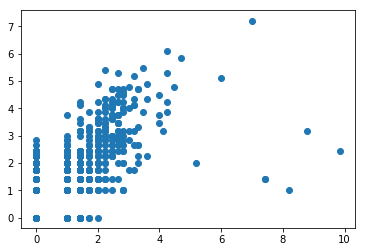

In [10]:
plt.scatter(np.sqrt(xist), np.sqrt(adata[:, 'Ces3a'].X))

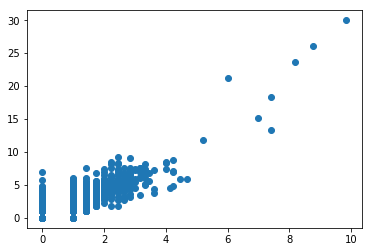

In [11]:
plt.scatter(np.sqrt(xist), np.sqrt(adata[:, 'Malat1'].X))

In [17]:
inlier_idx = (xist < 30)

In [18]:
c = np.corrcoef(np.sqrt(np.hstack([adata[:,'Xist'].X[inlier_idx,np.newaxis], adata.X[inlier_idx]])).T)

for i, j in zip(adata.var_names[np.argsort(-c[0])[1:20] - 1], c[0,np.argsort(-c[0])[1:20]]):
    print(i, '\t\t', np.round(j, 2))

Xist 		 1.0
Malat1 		 0.77
Sod1 		 0.74
Fga 		 0.73
Apob 		 0.72
Ces3a 		 0.71
H2-K1 		 0.71
Slco1b2 		 0.71
Acox1 		 0.71
Cp 		 0.7
Cyp3a11 		 0.7
P4hb 		 0.7
Ces1c 		 0.7
Acsl1 		 0.69
Cat 		 0.69
Igfbp4 		 0.69
Serpina3k 		 0.68
Apoe 		 0.68
Stard10 		 0.68


(array([1.200e+01, 9.340e+02, 3.779e+03, 3.095e+03, 1.391e+03, 5.770e+02,
        2.300e+02, 3.600e+01, 1.000e+00, 2.000e+00]),
 array([-0.17220737, -0.05498663,  0.0622341 ,  0.17945484,  0.29667558,
         0.41389632,  0.53111705,  0.64833779,  0.76555853,  0.88277926,
         1.        ]),
 <a list of 10 Patch objects>)

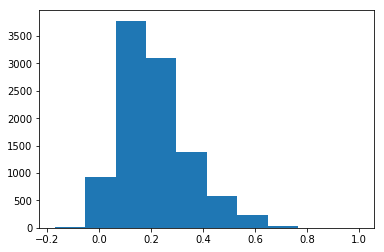

In [23]:
plt.hist(c[0][~np.isnan(c[0])])

Note baseline correlation is coming from relationship to n_counts.